In [2]:
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [13]:
HR=pd.read_csv("HRDataset.csv")
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
#Generating a report
profile=ProfileReport(HR)
profile.to_file(output_file="hr.html")

In [7]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [14]:
HR = HR.drop_duplicates()
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
#check the structure of data in dataset
HR.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [12]:
#check if there are missing values
HR.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

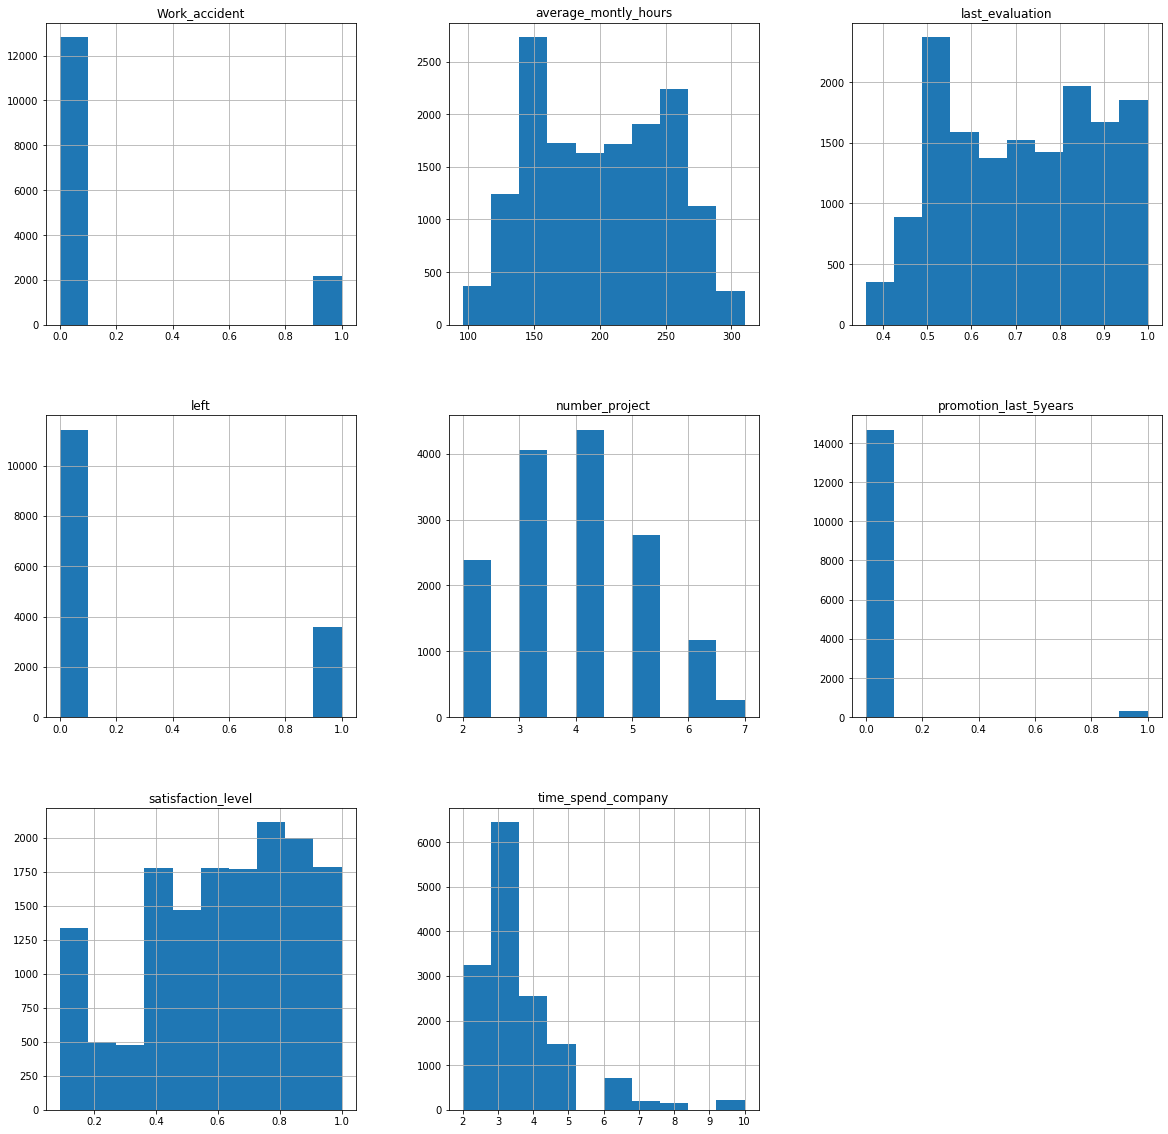

In [12]:
#have a look at distribution of data

HR.hist(figsize=(20,20))
plt.show()

In [16]:
N_HR=HR[['satisfaction_level','average_montly_hours','promotion_last_5years',
'salary']]
N_HR.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [17]:
 dumm=pd.get_dummies(N_HR.salary,prefix="sal")
dumm.head()

,sal_high,sal_low,sal_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [18]:
HR_F=pd.concat([N_HR,dumm],axis=1)
HR_F

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,sal_high,sal_low,sal_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
11995,0.90,259,1,high,1,0,0
11996,0.74,266,1,high,1,0,0
11997,0.85,185,1,high,1,0,0
11998,0.33,172,1,high,1,0,0


In [20]:
x=HR_F.drop(['salary','sal_medium'], axis='columns')
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,sal_high,sal_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [22]:
y=HR.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.3)

In [24]:
reg=LogisticRegression()
hra=reg.fit(x,y)
hra

c:\python3.7\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [25]:
xtest.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,sal_high,sal_low
1513,0.84,250,0,0,0
6568,0.63,228,0,0,0
3873,0.22,193,0,0,1
1978,0.44,156,0,0,0
11181,0.37,113,1,0,0


In [26]:
hra.predict(xtest.head())

array([0, 0, 0, 0, 0], dtype=int64)

In [ ]:
#Model score

In [27]:
hra.score(xtest,ytest)

0.856325947105075